<a href="https://colab.research.google.com/github/Sivarangani/ranghanihcode/blob/main/ranganihcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"blessington","key":"8218794cdb411044691421f70549e53b"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d taejoongyoon/mitbit-arrhythmia-database

 99% 284M/288M [00:09<00:00, 36.4MB/s]
100% 288M/288M [00:09<00:00, 32.2MB/s]


In [ ]:
!unzip mitbit-arrhythmia-database

Archive:  mitbit-arrhythmia-database.zip
  inflating: mitbih_database/100.csv  
  inflating: mitbih_database/100annotations.txt  
  inflating: mitbih_database/101.csv  
  inflating: mitbih_database/101annotations.txt  
  inflating: mitbih_database/102.csv  
  inflating: mitbih_database/102annotations.txt  
  inflating: mitbih_database/103.csv  
  inflating: mitbih_database/103annotations.txt  
  inflating: mitbih_database/104.csv  
  inflating: mitbih_database/104annotations.txt  
  inflating: mitbih_database/105.csv  
  inflating: mitbih_database/105annotations.txt  
  inflating: mitbih_database/106.csv  
  inflating: mitbih_database/106annotations.txt  
  inflating: mitbih_database/107.csv  
  inflating: mitbih_database/107annotations.txt  
  inflating: mitbih_database/108.csv  
  inflating: mitbih_database/108annotations.txt  
  inflating: mitbih_database/109.csv  
  inflating: mitbih_database/109annotations.txt  
  inflating: mitbih_database/111.csv  
  inflating: mitbih_database/1

In [ ]:
!pip install keras

In [ ]:
# libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import itertools
import collections

%matplotlib inline


In [ ]:
plt.rcParams["figure.figsize"] = (30,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True


In [ ]:
def get_train_inputs():
    x = tf.constant(X_train)
    y = tf.constant(y_train)
    return x, y

# Test Inputs
def get_test_inputs():
    x = tf.constant(X_test)
    y = tf.constant(y_test)
    return x, y

# Eval data
def get_eval_data():
    return tf.constant(X_test)

# Plot matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #cm[i, j] = 0 if np.isnan(cm[i, j]) else cm[i, j]
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
path = '/content/mitbih_database/mitbih_database/'
window_size = 160
maximum_counting = 10000

classes = ['N', 'L', 'R', 'A', 'V', '/']
n_classes = len(classes)
count_classes = [0]*n_classes

X = list()
y = list()


In [ ]:
filenames = next(os.walk(path))[2]

# Split and save .csv , .txt
records = list()
annotations = list()
filenames.sort()


In [ ]:
# segrefating filenames and annotations
for f in filenames:
    filename, file_extension = os.path.splitext(f)

    # *.csv
    if(file_extension == '.csv'):
        records.append(path + filename + file_extension)

    # *.txt
    else:
        annotations.append(path + filename + file_extension)


<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-14-567776b5294f>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:


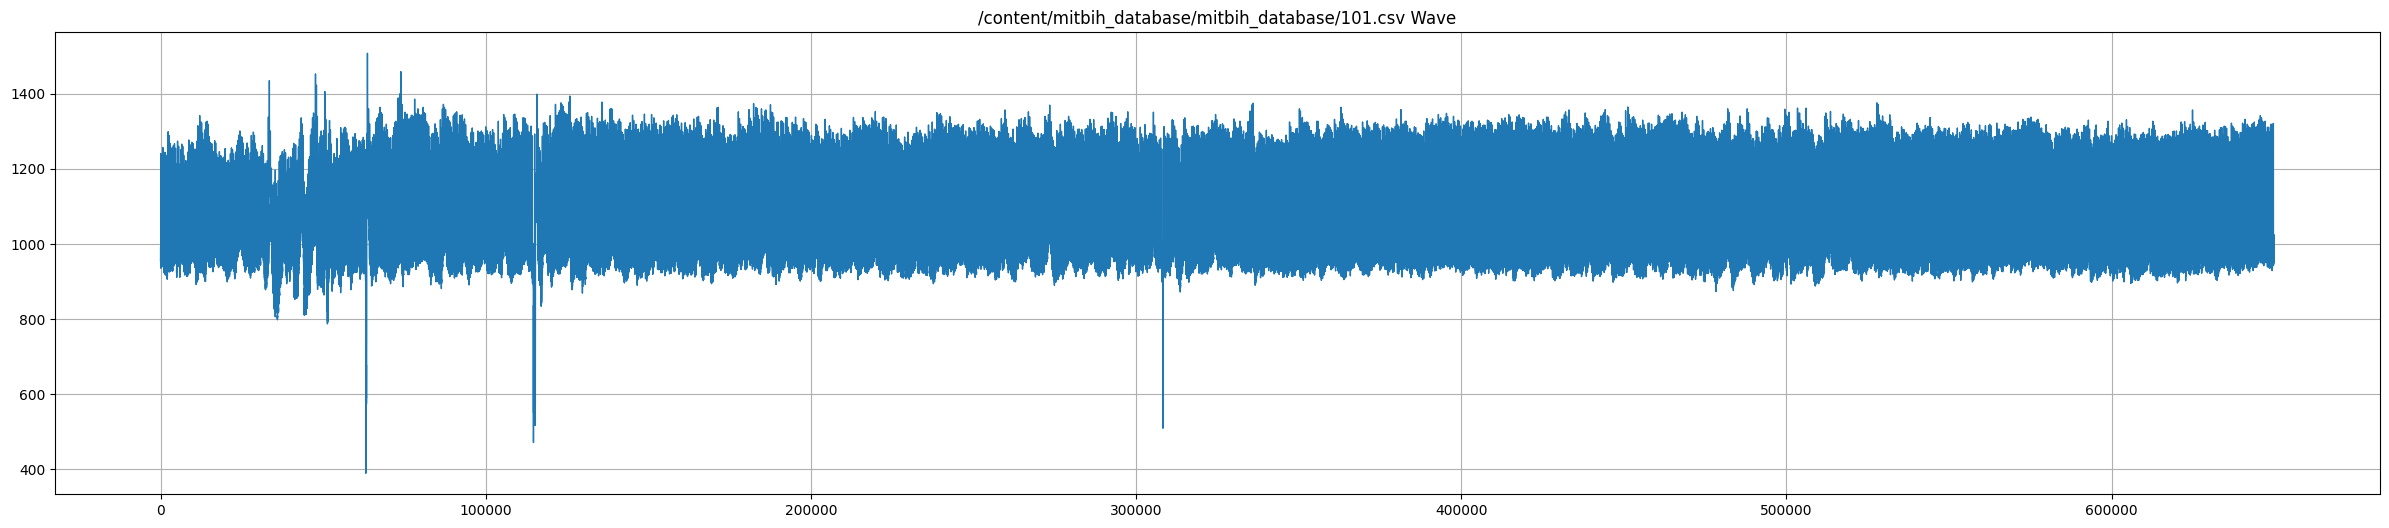

In [ ]:
# Records
for r in range(0,len(records)):
# for r in range(2, 3):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file\
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1

    if r is 1:
        # Plot each patient's signal
        plt.title(records[1] + " Wave")
        plt.plot(signals)
        plt.show()

    # Read anotations: R position and Arrhythmia class
    with open(annotations[r], 'r') as fileID:
        data = fileID.readlines()
        beat = list()

        for d in range(1, len(data)): # 0 index is Chart Head
            splitted = data[d].split(' ')
            splitted = filter(None, splitted)
            next(splitted) # Time... Clipping
            pos = int(next(splitted)) # Sample ID
            arrhythmia_type = next(splitted) # Type
            if(arrhythmia_type in classes):
                arrhythmia_index = classes.index(arrhythmia_type)
                if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
                    pass
                else:
                    count_classes[arrhythmia_index] += 1
                    if(window_size < pos and pos < (len(signals) - window_size)):
                        beat = signals[pos-window_size+1:pos+window_size]
                        X.append(beat)
                        y.append(arrhythmia_index)


0


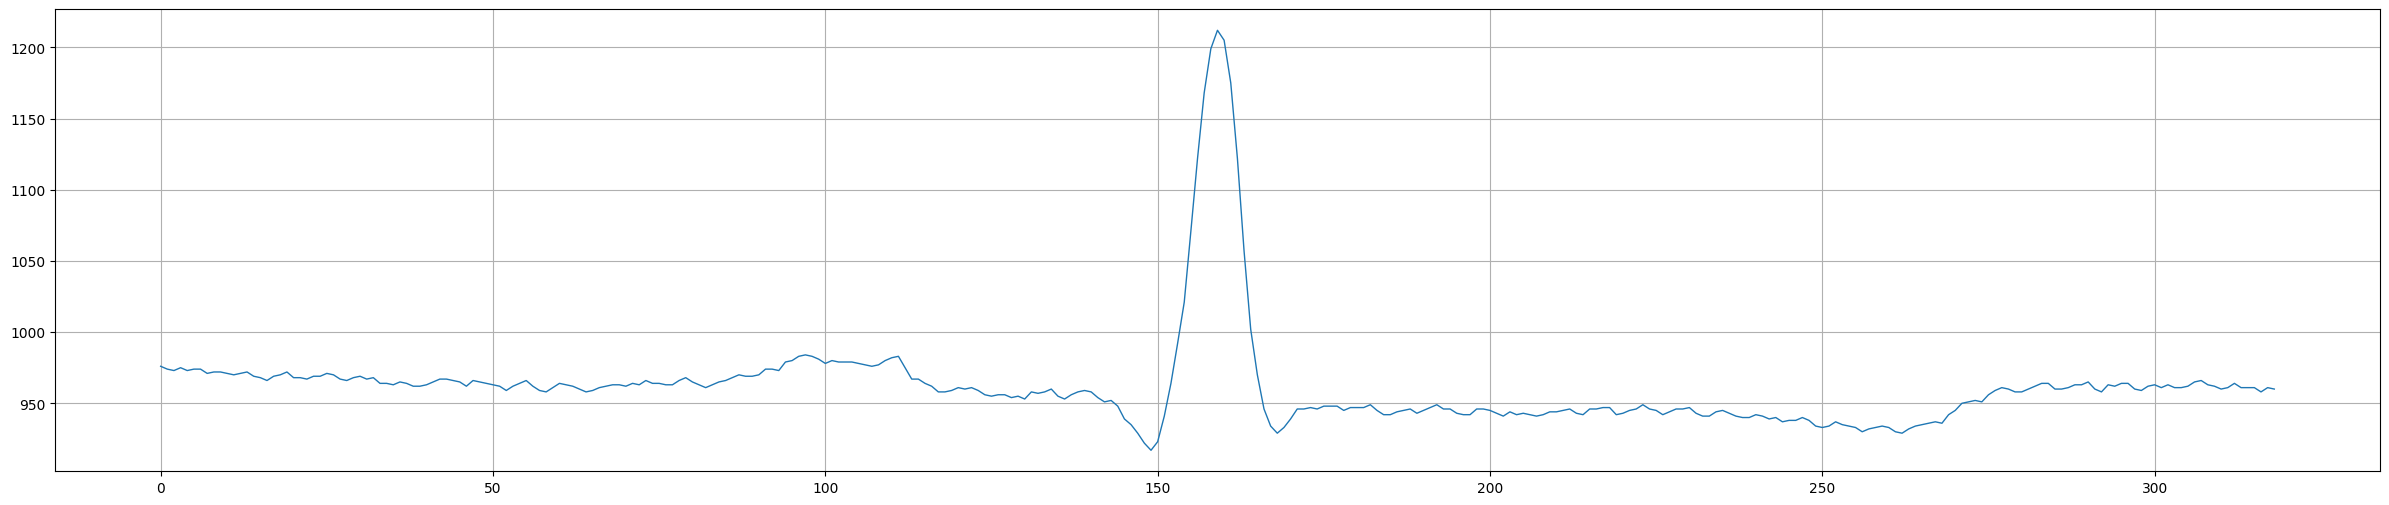

In [ ]:
plt.plot(X[0])
print(y[0])

In [ ]:
for i in range(0,len(X)):
        X[i].append(y[i])

print(np.shape(X))

(42021, 320)


0    9997
1    8071
2    7255
4    7129
5    7023
3    2546
Name: 319, dtype: int64


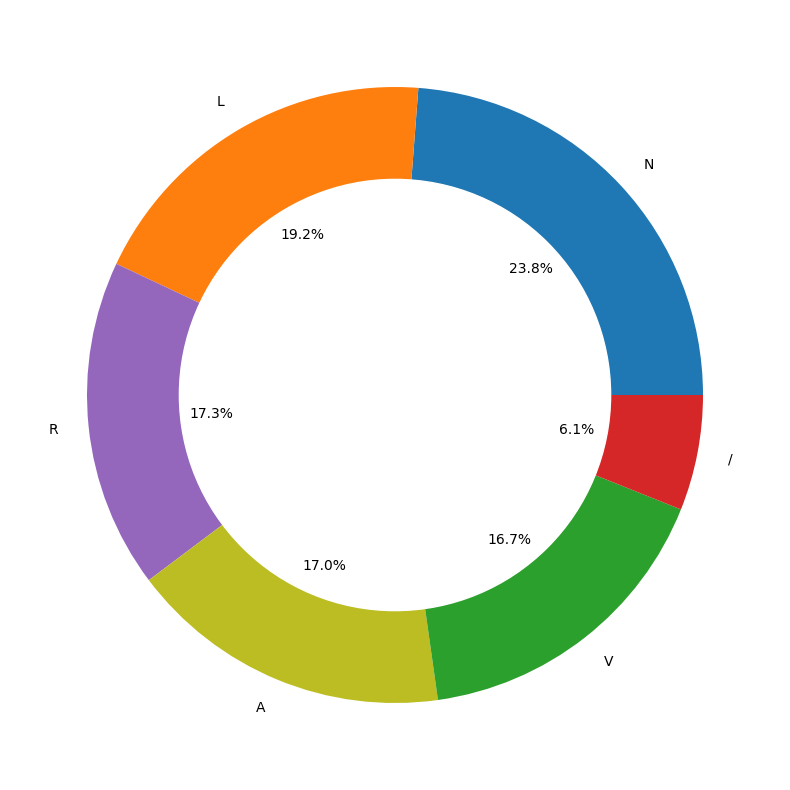

In [ ]:
# representation of classes % wise
import pandas as pd

X_train_df = pd.DataFrame(X)
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V', '/'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green','tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
# plot_percentage()
from sklearn.utils import resample

df_1=X_train_df[X_train_df[319]==1]
df_2=X_train_df[X_train_df[319]==2]
df_3=X_train_df[X_train_df[319]==3]
df_4=X_train_df[X_train_df[319]==4]
df_5=X_train_df[X_train_df[319]==5]
df_0=(X_train_df[X_train_df[319]==0]).sample(n=5000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=5000,random_state=122)
df_2_upsample=resample(df_2,replace=True,n_samples=5000,random_state=123)
df_3_upsample=resample(df_3,replace=True,n_samples=5000,random_state=124)
df_4_upsample=resample(df_4,replace=True,n_samples=5000,random_state=125)
df_5_upsample=resample(df_5,replace=True,n_samples=5000,random_state=126)

X_train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample,df_5_upsample])

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
Name: 319, dtype: int64


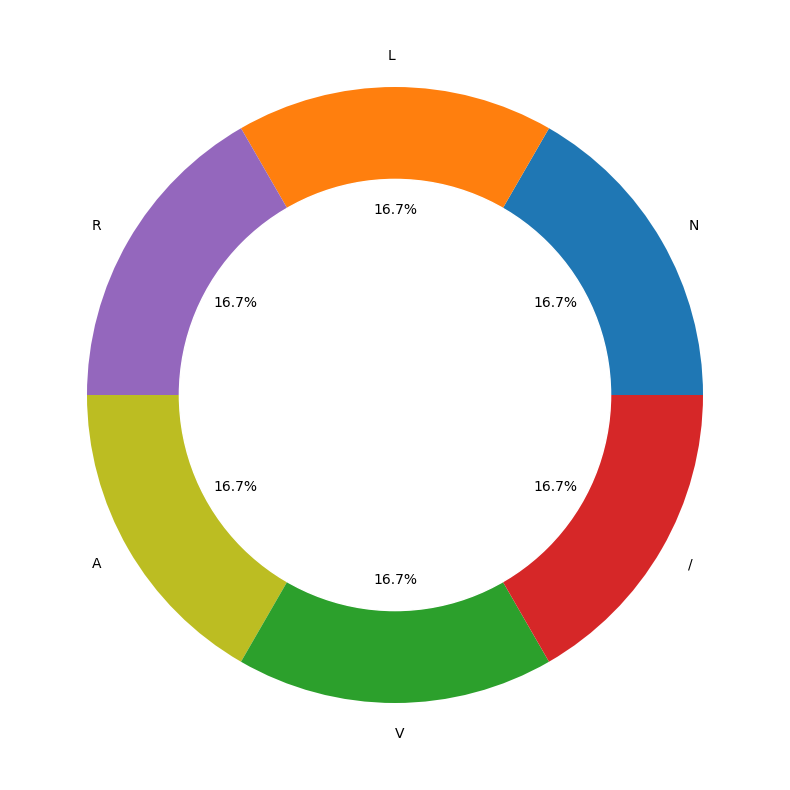

In [ ]:
per_class = X_train_df[319].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V', '/'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green','tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
# Train Test Split
train, test = train_test_split(X_train_df, test_size=0.20)

print("X_train : ", len(train))
print("X_test  : ", len(test))

X_train :  24000
X_test  :  6000


In [ ]:
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)
print(np.shape(y_train), np.shape(y_test))

(24000, 6) (6000, 6)


In [ ]:
X_train = train.iloc[:,:train.shape[1]-1].values
X_test = test.iloc[:,:test.shape[1]-1].values
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)
print(np.shape(X_train))

(24000, 319, 1)


In [ ]:
# from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, concatenate, MaxPool2D, ELU
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling2D,BatchNormalization
# from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint



In [ ]:
X_train.shape[1]

319

In [ ]:
from keras.layers import Layer
import tensorflow as tf
import numpy as np

class SineCosineLayer(Layer):
    def __init__(self, output_dim, alpha=1, beta=1, **kwargs):
        self.output_dim = output_dim
        self.alpha = alpha
        self.beta = beta
        super(SineCosineLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel',
                                      shape=(int(input_shape[-1]), self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
        super(SineCosineLayer, self).build(input_shape)

    def call(self, x):
        # Sine Cosine Algorithm
        W = self.kernel

        # Sine component
        sin_output = tf.math.sin(tf.matmul(x, W) * self.alpha)

        # Cosine component
        cos_output = tf.math.cos(tf.matmul(x, W) * self.beta)

        # Concatenate sine and cosine outputs
        output = tf.concat([sin_output, cos_output], axis=-1)

        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim * 2)

In [ ]:
from keras.applications import DenseNet121
from keras.optimizers import Adam
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def network(X_train, y_train, X_test, y_test):
    num_timesteps = X_train.shape[1]

    inputs_cnn = Input(shape=(num_timesteps, 1), name='inputs_cnn')

    # 1D CNN layers
    conv1 = Conv1D(64, kernel_size=3, activation='relu')(inputs_cnn)
    pool1 = MaxPooling1D(pool_size=2)(conv1)

    conv2 = Conv1D(128, kernel_size=3, activation='relu')(pool1)
    pool2 = MaxPooling1D(pool_size=2)(conv2)

    conv3 = Conv1D(256, kernel_size=3, activation='relu')(pool2)
    pool3 = MaxPooling1D(pool_size=2)(conv3)

    conv4 = Conv1D(64, kernel_size=3, activation='relu')(pool3)
    pool4 = MaxPooling1D(pool_size=2)(conv4)

    conv5 = Conv1D(128, kernel_size=3, activation='relu')(pool4)
    pool5 = MaxPooling1D(pool_size=2)(conv5)

    conv6 = Conv1D(256, kernel_size=3, activation='relu')(pool5)
    pool6 = MaxPooling1D(pool_size=2)(conv6)

    #conv7 = Conv1D(512, kernel_size=3, activation='relu')(pool6)
    #pool7 = MaxPooling1D(pool_size=2)(conv7)
    # Flatten the output
    flatten = Flatten()(pool6)

    # Apply SCA layer
    sca_output = SineCosineLayer(output_dim=1024)(flatten)

    # Dense layers
    dense_end1 = Dense(1024, activation='relu')(sca_output)

    # Output layer
    main_output = Dense(6, activation='softmax', name='main_output')(dense_end1)

    model = Model(inputs=inputs_cnn, outputs=main_output)

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
                 ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history = model.fit(X_train, y_train, epochs=10, callbacks=callbacks, batch_size=32, validation_data=(X_test, y_test))
    model.load_weights('best_model.h5')

    # Evaluate the model on the test set
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1] * 100))

    # Predictions
    prediction_proba = model.predict(X_test)
    predictions = np.argmax(prediction_proba, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Compute precision, recall, and F1-score
    precision = precision_score(y_true, predictions, average='weighted')
    recall = recall_score(y_true, predictions, average='weighted')
    f1 = f1_score(y_true, predictions, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, predictions)
    plot_confusion_matrix(cm, classes=['0', '1', '2', '3', '4', '5'], title='Confusion Matrix')

    return model, history


In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4','5']

    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

Epoch 1/10
750/750 [==============================] - 131s 171ms/step - loss: 2.0001 - accuracy: 0.1809 - val_loss: 1.8304 - val_accuracy: 0.1950
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 121s 161ms/step - loss: 1.7821 - accuracy: 0.2406 - val_loss: 1.7361 - val_accuracy: 0.2750
Epoch 3/10
750/750 [==============================] - 121s 161ms/step - loss: 1.4128 - accuracy: 0.4538 - val_loss: 1.3171 - val_accuracy: 0.4538
Epoch 4/10
750/750 [==============================] - 115s 154ms/step - loss: 1.2490 - accuracy: 0.5277 - val_loss: 1.1507 - val_accuracy: 0.5612
Epoch 5/10
750/750 [==============================] - 121s 162ms/step - loss: 1.4095 - accuracy: 0.4557 - val_loss: 1.9305 - val_accuracy: 0.1802
Epoch 6/10
750/750 [==============================] - 123s 164ms/step - loss: 1.7295 - accuracy: 0.2825 - val_loss: 1.3473 - val_accuracy: 0.4702
Epoch 7/10
750/750 [==============================] - 119s 159ms/step - loss: 1.2487 - accuracy: 0.5064 - val_loss: 1.0065 - val_accuracy: 0.5938
Epoch 8/10
750/750 [==============================] - 119s 159ms/step - loss: 1.0721 - accuracy: 0.5873 - val_loss: 0.9409 - val_accura

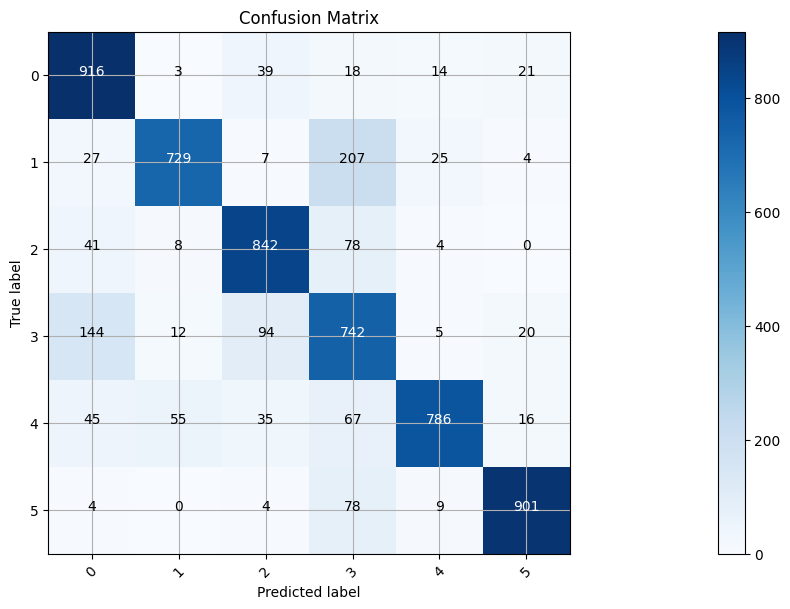

In [ ]:
model, history = network(X_train, y_train, X_test, y_test)

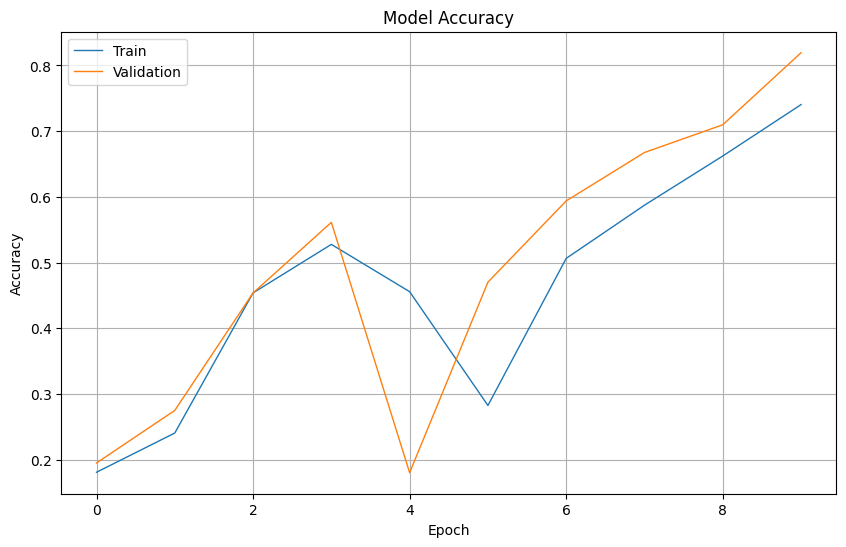

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



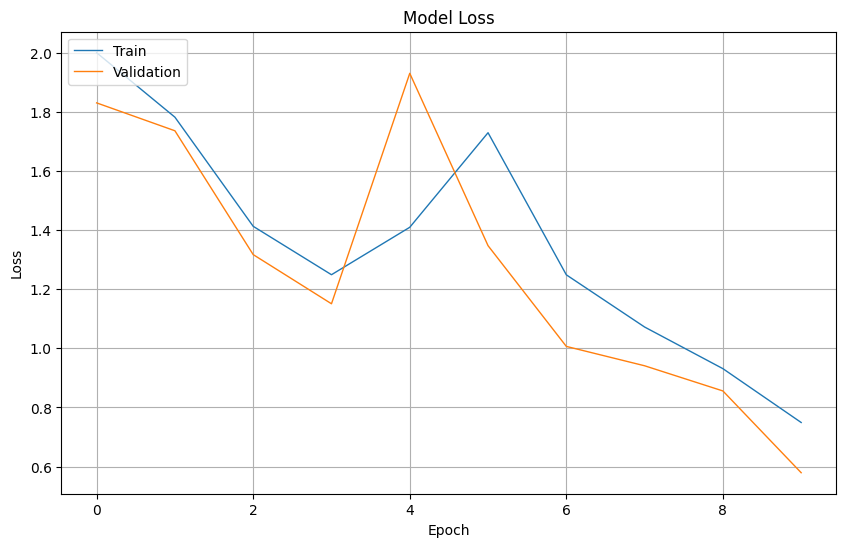

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)

# Extract accuracy from scores
overall_accuracy = scores[1]

print(f'Overall Accuracy: {overall_accuracy * 100:.2f}%')

In [ ]:
# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)

# Extract loss from scores
overall_loss = scores[0]

print(f'Overall Loss: {overall_loss:.4f}')